## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

In [484]:
import tensorflow as tf
tf.set_random_seed(42)

In [485]:
tf.__version__

'1.14.0'

In [486]:
import keras
import numpy as np
import pandas as pd
from keras.datasets import mnist
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [487]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [488]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [489]:
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_test shape: (10000, 28, 28) y_test shape: (10000,)


In [490]:
#Original labels (0:10) from the train-dataset
print(y_train[0:10])

[9 0 0 3 0 2 7 2 5 5]


In [491]:
#Original labels (0:10) from the test-dataset
print(y_test[0:10])

[9 2 1 1 6 1 4 6 5 7]


### Find dimensions of an image in the dataset

In [492]:
print("Image shape:", x_train [0].shape)

Image shape: (28, 28)


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [493]:
# Convert train and test labels to one hot vectors
Y_train = keras.utils.to_categorical(y_train, num_classes=10, dtype='float32')
Y_test = keras.utils.to_categorical(y_test, num_classes=10, dtype='float32')
print(Y_train[0:5])
print(Y_test[0:5])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


### Normalize both the train and test image data from 0-255 to 0-1

In [494]:
#Normalize both the train and test image data from 0-255 to 0-1
X_train, X_test = x_train/255.0, x_test/255.0

In [495]:
X_test.shape

(10000, 28, 28)

### Import the necessary layers from keras to build the model

In [496]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils
from tensorflow.keras.callbacks import EarlyStopping

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [497]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [498]:
#Initialize model
model = tf.keras.models.Sequential()

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [499]:
#Early stopping with patience=5
es = EarlyStopping(monitor='val_acc', mode='max', patience=5)

In [500]:
#Add first convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu', input_shape=(28,28,1)))
#Add second convolutional layer
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))

In [501]:
#model.output
#Flatten the output
model.add(tf.keras.layers.Flatten())
#Dense layer
model.add(tf.keras.layers.Dense(128, activation='relu'))
#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])


In [502]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
flatten_21 (Flatten)         (None, 18432)             0         
_________________________________________________________________
dense_42 (Dense)             (None, 128)               2359424   
_________________________________________________________________
dense_43 (Dense)             (None, 10)                1290      
Total params: 2,370,282
Trainable params: 2,370,282
Non-trainable params: 0
_________________________________________________________________


In [503]:
#Train the model
model.fit(X_train,Y_train,          
          validation_data=(X_test,Y_test),
          epochs=10,
          batch_size=32, 
          callbacks=[es])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 23s 377us/sample - loss: 0.3828 - acc: 0.8620 - val_loss: 0.3025 - val_acc: 0.8916
Epoch 2/10
60000/60000 [==============================] - 22s 362us/sample - loss: 0.2391 - acc: 0.9128 - val_loss: 0.2530 - val_acc: 0.9084
Epoch 3/10
60000/60000 [==============================] - 22s 362us/sample - loss: 0.1723 - acc: 0.9352 - val_loss: 0.2545 - val_acc: 0.9093
Epoch 4/10
60000/60000 [==============================] - 22s 363us/sample - loss: 0.1193 - acc: 0.9559 - val_loss: 0.2862 - val_acc: 0.9118
Epoch 5/10
60000/60000 [==============================] - 22s 364us/sample - loss: 0.0791 - acc: 0.9706 - val_loss: 0.3135 - val_acc: 0.9103
Epoch 6/10
60000/60000 [==============================] - 22s 364us/sample - loss: 0.0535 - acc: 0.9800 - val_loss: 0.3830 - val_acc: 0.9071
Epoch 7/10
60000/60000 [==============================] - 22s 365us/sample - loss: 0.0364 - acc: 0.9868 

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [510]:
#Initialize model, reshape & normalize data
model1 = tf.keras.models.Sequential()

In [511]:
#Add first convolutional layer
model1.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu', input_shape=(28,28,1)))
#Add second convolutional layer
model1.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))

In [512]:
#Add MaxPooling layer
model1.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

In [513]:
model1.output

<tf.Tensor 'max_pooling2d_6/MaxPool:0' shape=(?, 12, 12, 32) dtype=float32>

In [514]:
#Flatten the output
model1.add(tf.keras.layers.Flatten())

#Dense layer
model1.add(tf.keras.layers.Dense(128, activation='relu'))

#Add another dropout layer
model1.add(tf.keras.layers.Dropout(0.25))

#Output layer
model1.add(tf.keras.layers.Dense(10, activation='softmax'))
model1.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [515]:
model1.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 4608)              0         
_________________________________________________________________
dense_44 (Dense)             (None, 128)               589952    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 10)              

In [516]:
#Train the model
model1.fit(X_train,Y_train,          
          validation_data=(X_test,Y_test),
          epochs=10,
          batch_size=32, 
          callbacks=[es])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 21s 344us/sample - loss: 0.4070 - acc: 0.8535 - val_loss: 0.2915 - val_acc: 0.8931
Epoch 2/10
60000/60000 [==============================] - 20s 328us/sample - loss: 0.2636 - acc: 0.9043 - val_loss: 0.2630 - val_acc: 0.9043
Epoch 3/10
60000/60000 [==============================] - 20s 329us/sample - loss: 0.2191 - acc: 0.9189 - val_loss: 0.2390 - val_acc: 0.9129
Epoch 4/10
60000/60000 [==============================] - 20s 329us/sample - loss: 0.1835 - acc: 0.9316 - val_loss: 0.2319 - val_acc: 0.9174
Epoch 5/10
60000/60000 [==============================] - 20s 331us/sample - loss: 0.1561 - acc: 0.9414 - val_loss: 0.2254 - val_acc: 0.9217
Epoch 6/10
60000/60000 [==============================] - 20s 326us/sample - loss: 0.1341 - acc: 0.9493 - val_loss: 0.2394 - val_acc: 0.9232
Epoch 7/10
60000/60000 [==============================] - 20s 328us/sample - loss: 0.1144 - acc: 0.9565 

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [521]:
transform_fn = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=False,
                                                               width_shift_range=0.2,
                                                               height_shift_range=0.2,
                                                               rotation_range=30,
                                                               shear_range=0.2,
                                                               zoom_range=0.3)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

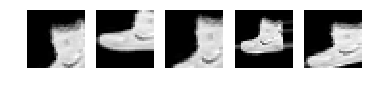

In [522]:
from matplotlib import pyplot as plt
gen = transform_fn.flow(X_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [523]:
model1.fit_generator(transform_fn.flow(X_train, Y_train, batch_size = 32),
 validation_data = (X_test, Y_test), steps_per_epoch = len(X_train) // 32,
 epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.7003 - acc: 0.7378 - val_loss: 0.5093 - val_acc: 0.8015
Epoch 2/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.6561 - acc: 0.7563 - val_loss: 0.5235 - val_acc: 0.8080
Epoch 3/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.6220 - acc: 0.7679 - val_loss: 0.4580 - val_acc: 0.8307
Epoch 4/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.6046 - acc: 0.7747 - val_loss: 0.6079 - val_acc: 0.7901: 0s - loss: 0.6038 -
Epoch 5/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.5836 - acc: 0.7833 - val_loss: 0.5203 - val_acc: 0.8158
Epoch 6/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.5679 - acc: 0.7894 - val_loss: 0.4737 - val_acc: 0.8351
Epoch 7/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.5606 - acc: 0.7934 - val_loss: 0.5514 - val_acc: 0.8119
Epoch 8/10
1875/1875 [=====

###  Report the final train and validation accuracy

In [524]:
print(model.evaluate(X_test, Y_test))

10000/10000 [==============================] - 2s 167us/sample - loss: 0.5599 - acc: 0.9104
[0.5599192609481514, 0.9104]


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [591]:
from keras.datasets import cifar10

### **Load CIFAR10 dataset**

In [592]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [617]:
#Normalize both the train and test image data from 0-255 to 0-1
x_train, x_train = x_train/255.0, x_test/255.0

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [618]:
img_generate = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

### **Prepare/fit the generator.**

In [619]:
img_generate.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

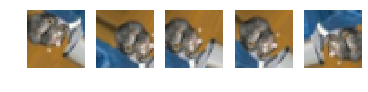

In [620]:
from matplotlib import pyplot as plt
gen = img_generate.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()
